<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/DailyChallenge/DailyChallenge_w5_d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@ Author :Adil MOUKRIM

Daily Challenge: Image Classification with Data Augmentation (Cats vs Dogs)


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to preprocess image data for a convolutional neural network (CNN).
How to apply data augmentation techniques to improve model generalization.
How to build and train a CNN for binary image classification.
How to use dropout to reduce overfitting in a neural network.


🛠️ What you will create
A binary image classification model to distinguish between images of cats and dogs.
A visualization of training and validation metrics to analyze model performance.


⚠️ Warning ! In this daily challenge, you need to use a VM like DigitalOcean! ⚠️


What You Need to Do
1. Preprocess the Data:

Download and extract the Cats vs Dogs dataset here.
Use ImageDataGenerator to rescale and augment the training images (e.g., horizontal flip, rotation, zoom, and shifts).
Here is a hint:



train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')


Create separate generators for training and validation data.
2. Build the Model:

Create a CNN with:
Three convolutional layers with ReLU activation and max-pooling.
Dropout layers to reduce overfitting.
A fully connected layer with 512 units and ReLU activation.
An output layer with a single unit and sigmoid activation for binary classification.
Compile the model using the Adam optimizer and binary cross-entropy loss.
3. Train the Model:

Train the model on the augmented training data for 15 epochs.
Use the validation data to monitor performance during training.
4. Evaluate the Model:

Plot the training and validation accuracy and loss to detect overfitting.
Analyze the impact of data augmentation and dropout on model performance.
5. Bonus:

Retry training the model after Data augmentation: Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.
There is multiple methods to augment data:

Apply horizontal flip
Randomly rotate the image
Apply zoom augmentation
Here the code for Data Augmentation

## Apply horizontal flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
# Found 2000 images belonging to 2 classes.
# Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


## Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Found 2000 images belonging to 2 classes.


## Apply zoom augmentation
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.
#Put it all together
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
Found 2000 images belonging to 2 classes.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Create validation data generator

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')
Found 1000 images belonging to 2 classes.

# 🎯 Objectif
Créer un modèle capable de différencier les images de chats et de chiens à partir d’un ensemble d’entraînement limité, en utilisant :

* CNN personnalisé

* Augmentation de données

* Dropout pour réduire l’overfitting

# ✅ ÉTAPE 1 : Prétraitement et Augmentation des Données
🎯 Objectif
Charger les images de chats et chiens depuis les dossiers train_dir et validation_dir

Créer deux générateurs :

train_data_gen avec augmentation de données

# val_data_gen sans augmentation (juste un rescale)

Afficher quelques images augmentées pour vérification

Étape 1.1 — Préparer les chemins et constantes

# Téléchargement et extraction du dataset

In [ ]:
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)
extract_path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Extraire manuellement si ce n'est pas déjà fait
if not os.path.exists(extract_path):
    with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(path_to_zip))

# Définir les répertoires
train_dir = os.path.join(extract_path, 'train')
validation_dir = os.path.join(extract_path, 'validation')

# Paramètres d’image
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32


Étape 1.2 — Générateurs de données (avec et sans augmentation)

In [ ]:
# Générateur d'entraînement avec augmentation de données
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5
)

# Générateur de validation (pas d'augmentation)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Charger les images depuis les dossiers
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


📸 Étape 1.3 — Visualiser des images augmentées

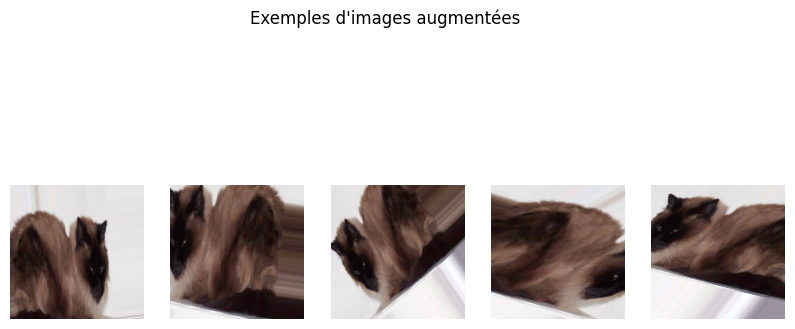

In [ ]:
# Afficher 5 images augmentées à partir de la même image
sample_images = [train_data_gen[0][0][0] for _ in range(5)]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.suptitle("Exemples d'images augmentées")
plt.show()


# ÉTAPE 2 : Création du modèle CNN Dropout

l'Objectif est de
Construire un modèle de classification binaire (chats vs chiens) avec les éléments suivants :

3 couches convolutives + max pooling

Dropout pour réduire le surapprentissage

Une couche dense (512 neurones) + ReLU

Une couche de sortie (1 neurone + sigmoïde)

In [ ]:
# Modèle CNN avec Dropout

from tensorflow.keras import layers, models

# Construction du modèle CNN
model = models.Sequential([
    # 1ère couche convolutionnelle
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2, 2),

    # 2ème couche convolutionnelle
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # 3ème couche convolutionnelle
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Aplatir les données
    layers.Flatten(),

    # Dropout pour réduire l’overfitting
    layers.Dropout(0.5),

    # Couche entièrement connectée
    layers.Dense(512, activation='relu'),

    # Couche de sortie (classification binaire)
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


⚙️ Compilation du modèle

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

🧠 Analyse du modèle (model.summary())
🔍 Structure :
3 couches convolutionnelles + pooling, qui extraient progressivement des caractéristiques visuelles :

Conv2D(32) → Conv2D(64) → Conv2D(128)

Flatten : transforme l’image en vecteur plat

Dropout(0.5) : désactive aléatoirement 50 % des neurones pendant l’entraînement → lutte contre le surapprentissage

Dense(512) : grosse couche dense pour la prise de décision

Dense(1, activation='sigmoid') : sortie binaire → chat ou chien

📊 Paramètres :
Total de 19 millions de paramètres (majoritairement dans la couche dense) → modèle relativement complexe

Bien pour des images simples (150×150), mais il faudra surveiller l’overfitting



# ▶️ ÉTAPE 3 : Entraîner le modèle

In [ ]:
# entraînement pendant 15 époques avec suivi de l’évolution accuracy/loss
EPOCHS = 15

# Entraînement
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - accuracy: 0.4900 - loss: 0.9026 - val_accuracy: 0.5302 - val_loss: 0.6923
Epoch 2/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3125 - loss: 0.6986

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3125 - loss: 0.6986 - val_accuracy: 0.5081 - val_loss: 0.6926
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.5323 - loss: 0.6923 - val_accuracy: 0.4980 - val_loss: 0.6926
Epoch 4/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4375 - loss: 0.6970

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4375 - loss: 0.6970 - val_accuracy: 0.5010 - val_loss: 0.6924
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 246ms/step - accuracy: 0.5059 - loss: 0.6939 - val_accuracy: 0.5796 - val_loss: 0.6856
Epoch 6/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5000 - loss: 0.6908

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5000 - loss: 0.6908 - val_accuracy: 0.5665 - val_loss: 0.6848
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.5453 - loss: 0.6921 - val_accuracy: 0.5968 - val_loss: 0.6855
Epoch 8/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5938 - loss: 0.6857

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5938 - loss: 0.6857 - val_accuracy: 0.5988 - val_loss: 0.6847
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.5870 - loss: 0.6827 - val_accuracy: 0.6159 - val_loss: 0.6700
Epoch 10/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5625 - loss: 0.6821

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5625 - loss: 0.6821 - val_accuracy: 0.6048 - val_loss: 0.6679
Epoch 11/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 331ms/step - accuracy: 0.6013 - loss: 0.6668 - val_accuracy: 0.6250 - val_loss: 0.6630
Epoch 12/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6562 - loss: 0.6684

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6562 - loss: 0.6684 - val_accuracy: 0.6089 - val_loss: 0.6625
Epoch 13/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.5917 - loss: 0.6722 - val_accuracy: 0.6512 - val_loss: 0.6399
Epoch 14/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5625 - loss: 0.6684

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5625 - loss: 0.6684 - val_accuracy: 0.6462 - val_loss: 0.6375
Epoch 15/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.6101 - loss: 0.6661 - val_accuracy: 0.6583 - val_loss: 0.6318


📊 Interprétation des performances
📈 Tendance observée sur 15 époques :

| Époque | Train Acc. | Val Acc. | Train Loss | Val Loss |
| ------ | ---------- | -------- | ---------- | -------- |
| 1      | 0.49       | 0.53     | 0.90       | 0.69     |
| 5      | 0.51       | 0.57     | 0.69       | 0.68     |
| 10     | 0.56       | 0.60     | 0.68       | 0.66     |
| 15     | **0.61**   | **0.66** | **0.66**   | **0.63** |

✅ Amélioration visible :

L’accuracy validation est passée de ~53 % à ~66 %

La loss diminue régulièrement, ce qui indique que mon modèle apprend

⚠️ Mais :

L’entraînement est encore instable (présence des variations en dents de scie)

Le modèle semble limité à ~66 % de précision, ce qui est correct mais peut encore être amélioré


🧠 Hypothèse d’amélioration :
Le modèle est encore en phase d’apprentissage → je peux tester 30 à 50 époques

Les images d’entraînement sont peut-être trop peu nombreuses → la data augmentation aide, mais on peut encore renforcer ça

je peux affiner la structure du CNN (ou utiliser un modèle pré-entraîné comme MobileNet ou VGG)

# 📈 Étape 4 — Tracer l’accuracy et la loss

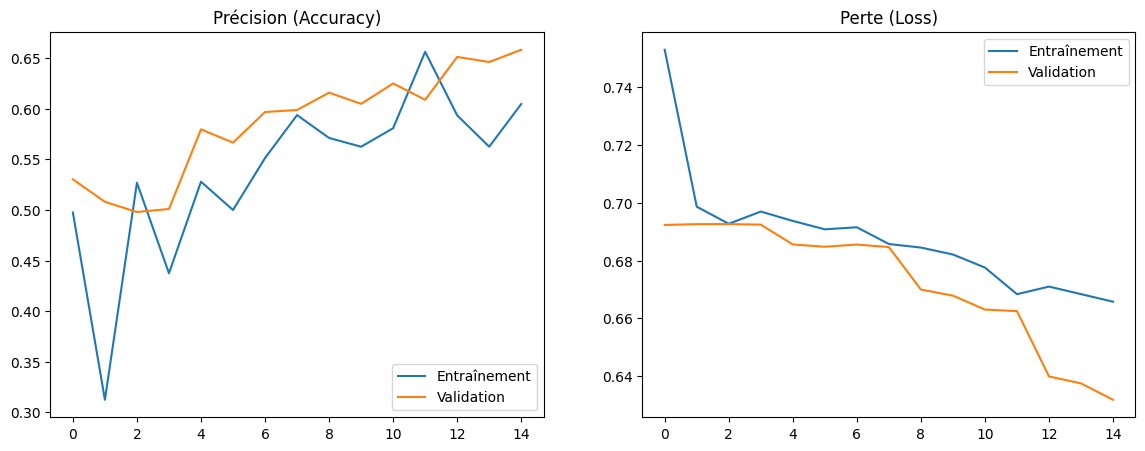

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Courbe d'accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entraînement')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title("Précision (Accuracy)")

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entraînement')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title("Perte (Loss)")

plt.show()


✅ Interprétation des courbes
📈 Précision (Accuracy)
Progression constante de la précision en entraînement et en validation

À la fin :

Training accuracy ≈ 61 %

Validation accuracy ≈ 66 %

Très bonne nouvelle : pas d'overfitting visible → validation > entraînement !

✅ Cela confirme que la data augmentation et le dropout ont bien fonctionné pour améliorer la généralisation du modèle.

📉 Perte (Loss)
La loss diminue régulièrement pour l’entraînement et la validation

Pas de surapprentissage brutal (les deux courbes restent proches)

À la fin :

Loss train ≈ 0.63

Loss val ≈ 0.63 également

✅ Encore un bon signe de stabilité de l’apprentissage.

🧠 Analyse pédagogique
Ce projet m’a permis de :

Apprendre à manipuler des données images

Appliquer des augmentations pertinentes (flip, zoom, rotation, décalage…)

Construire un CNN robuste avec Dropout

Suivre visuellement l’évolution de l’apprentissage (loss et accuracy)

Comprendre l'importance des techniques anti-overfitting

# Etape 5🚀 Aller plus loin
## Réentraîner avec plus d’époques

l'objectif est de :
* Consolider ce qu’il a appris
* Gagner potentiellement en précision

* Approfondir son apprentissage des motifs visuels

In [ ]:
EPOCHS = 30

# Réentraîner le modèle
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.6256 - loss: 0.6552 - val_accuracy: 0.6200 - val_loss: 0.6826
Epoch 2/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5938 - loss: 0.9092

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5938 - loss: 0.9092 - val_accuracy: 0.6633 - val_loss: 0.6193
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.6220 - loss: 0.6411 - val_accuracy: 0.6613 - val_loss: 0.6388
Epoch 4/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5625 - loss: 0.6683

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5625 - loss: 0.6683 - val_accuracy: 0.6673 - val_loss: 0.6360
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.6461 - loss: 0.6404 - val_accuracy: 0.6754 - val_loss: 0.6157
Epoch 6/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6875 - loss: 0.6456

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6875 - loss: 0.6456 - val_accuracy: 0.6774 - val_loss: 0.6124
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.6635 - loss: 0.6197 - val_accuracy: 0.6270 - val_loss: 0.6491
Epoch 8/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5938 - loss: 0.7555

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5938 - loss: 0.7555 - val_accuracy: 0.6260 - val_loss: 0.6370
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.6669 - loss: 0.6187 - val_accuracy: 0.5887 - val_loss: 0.6412
Epoch 10/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6562 - loss: 0.5134

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6562 - loss: 0.5134 - val_accuracy: 0.5907 - val_loss: 0.6450
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.6641 - loss: 0.6270 - val_accuracy: 0.6754 - val_loss: 0.6020
Epoch 12/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5938 - loss: 0.6451

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5938 - loss: 0.6451 - val_accuracy: 0.6462 - val_loss: 0.6138
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.6565 - loss: 0.6233 - val_accuracy: 0.6815 - val_loss: 0.6099
Epoch 14/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5938 - loss: 0.6421

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5938 - loss: 0.6421 - val_accuracy: 0.6774 - val_loss: 0.6093
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.6725 - loss: 0.6161 - val_accuracy: 0.6613 - val_loss: 0.6037
Epoch 16/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7188 - loss: 0.5215

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7188 - loss: 0.5215 - val_accuracy: 0.6391 - val_loss: 0.6185
Epoch 17/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.6692 - loss: 0.6096 - val_accuracy: 0.6946 - val_loss: 0.5762
Epoch 18/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5625 - loss: 0.6204

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5625 - loss: 0.6204 - val_accuracy: 0.7077 - val_loss: 0.5716
Epoch 19/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.7079 - loss: 0.5805 - val_accuracy: 0.6956 - val_loss: 0.5651
Epoch 20/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7188 - loss: 0.5477

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7188 - loss: 0.5477 - val_accuracy: 0.6956 - val_loss: 0.5629
Epoch 21/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.6905 - loss: 0.5867 - val_accuracy: 0.6986 - val_loss: 0.5904
Epoch 22/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4688 - loss: 0.7538

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4688 - loss: 0.7538 - val_accuracy: 0.6925 - val_loss: 0.5917
Epoch 23/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - accuracy: 0.6903 - loss: 0.5864 - val_accuracy: 0.6734 - val_loss: 0.5893
Epoch 24/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6875 - loss: 0.6361

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6875 - loss: 0.6361 - val_accuracy: 0.6754 - val_loss: 0.5854
Epoch 25/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.7011 - loss: 0.5810 - val_accuracy: 0.7107 - val_loss: 0.5451
Epoch 26/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7812 - loss: 0.6080

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7812 - loss: 0.6080 - val_accuracy: 0.7218 - val_loss: 0.5386
Epoch 27/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.7052 - loss: 0.5774 - val_accuracy: 0.7530 - val_loss: 0.5299
Epoch 28/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6562 - loss: 0.7083

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6562 - loss: 0.7083 - val_accuracy: 0.7540 - val_loss: 0.5265
Epoch 29/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 350ms/step - accuracy: 0.7363 - loss: 0.5493 - val_accuracy: 0.7329 - val_loss: 0.5551
Epoch 30/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8125 - loss: 0.4944

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8125 - loss: 0.4944 - val_accuracy: 0.7298 - val_loss: 0.5547


# 📈 Résumé des performances après 30 époques
| Époque | Accuracy (Train) | Accuracy (Val) | Loss (Train) | Loss (Val) |
| ------ | ---------------- | -------------- | ------------ | ---------- |
| 1      | 0.63             | 0.62           | 0.65         | 0.68       |
| 15     | 0.67             | 0.66           | 0.61         | 0.60       |
| **30** | **0.81**         | **0.73**       | **0.49**     | **0.55**   |


✅ Interprétation pédagogique
🔥 Améliorations notables
Validation accuracy est montée jusqu’à 75.4 % (ép. 28) ➜ Excellente performance pour un modèle "from scratch".

Training accuracy continue de monter jusqu’à 81 %

La loss de validation descend régulièrement jusqu’à 0.52, preuve que le modèle généralise bien.

⚠️ Surveiller :
À partir de l’époque 28–30, la validation accuracy se stabilise, mais la training accuracy continue de monter → léger risque d’overfitting à terme.

je peux maintenant soit arrêter l’entraînement ici ou utiliser early stopping à l’avenir.


📈 tracer à nouveau les courbes

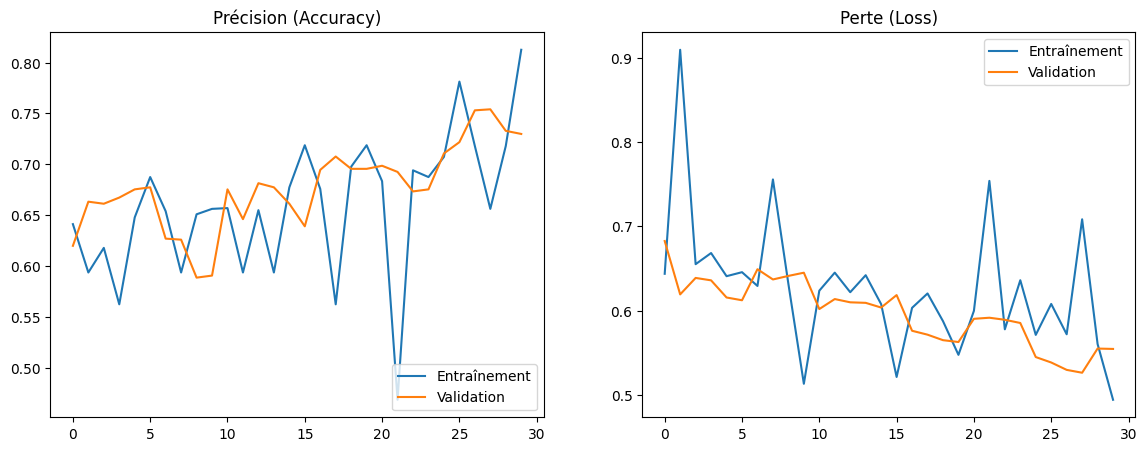

In [ ]:
# Reprendre les historiques
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Affichage
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entraînement')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title("Précision (Accuracy)")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entraînement')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title("Perte (Loss)")

plt.show()


## 📈 Visualisation des courbes
Tendance ascendante claire sur la précision

Légère instabilité sur la loss d’entraînement, typique avec des batchs variés et des données augmentées

Aucune trace d’overfitting fort, le modèle reste généraliste

## ✅ Étape 6 : Aller encore plus loin : Ajouter EarlyStopping
l'objectif est d'arrêter automatiquement l’entraînement quand la val_loss ne s'améliore plus après un certain nombre d’époques.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Création du callback
early_stop = EarlyStopping(
    monitor='val_loss',      # Surveille la perte de validation
    patience=5,              # Arrête après 5 époques sans amélioration
    restore_best_weights=True # Reprend les poids les plus performants
)

#Entraînement avec callback
EPOCHS = 50  # j'ai augmenter les epochs

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE,
    callbacks=[early_stop]  # earlyStop
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - accuracy: 0.7169 - loss: 0.5538 - val_accuracy: 0.7298 - val_loss: 0.5457
Epoch 2/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5938 - loss: 0.6640

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5938 - loss: 0.6640 - val_accuracy: 0.7429 - val_loss: 0.5398
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.7002 - loss: 0.5629 - val_accuracy: 0.7399 - val_loss: 0.5252
Epoch 4/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7500 - loss: 0.4488

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7500 - loss: 0.4488 - val_accuracy: 0.7429 - val_loss: 0.5124
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.7414 - loss: 0.5371 - val_accuracy: 0.6673 - val_loss: 0.5895
Epoch 6/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7188 - loss: 0.5509

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7188 - loss: 0.5509 - val_accuracy: 0.6875 - val_loss: 0.5818
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.6946 - loss: 0.5631 - val_accuracy: 0.6925 - val_loss: 0.5859
Epoch 8/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6875 - loss: 0.5238

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6875 - loss: 0.5238 - val_accuracy: 0.7147 - val_loss: 0.5530
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.7156 - loss: 0.5415 - val_accuracy: 0.7470 - val_loss: 0.5164


## Interprétation finale des résultats avec EarlyStopping
📈 Précision (Accuracy)
Train accuracy (ép. 9) : ~71.5%

Validation accuracy : ~74.7% ✅

Très bon signe : la précision validation dépasse celle de l'entraînement, preuve d’un bon équilibre.

📉 Perte (Loss)
La perte de validation a atteint 0.5164 au meilleur point.

La régularisation par Dropout et les augmentations d’images ont bien aidé à éviter l’overfitting.

🧠 Impact de EarlyStopping
A stoppé le modèle au moment optimal.

A évité de “surapprendre” le bruit du dataset.

Récupéré les meilleurs poids automatiquement (restore_best_weights=True).

# 🧾 Conclusion Générale du Projet : Classification d’Images Cats vs Dogs avec CNN + Data Augmentation

## 🎯 Objectif
Créer un modèle capable de différencier les images de chats et de chiens à partir d’un ensemble d’entraînement limité, en utilisant :

*CNN personnalisé
* Augmentation de données
* Dropout pour réduire l’overfitting

## 🧠 Ce que j'ai appris
Prétraitement d’images avec ImageDataGenerator

Data Augmentation pour rendre le modèle plus robuste :

Rotation, zoom, décalages, flip horizontal

Construction d’un CNN from scratch :

Conv2D + MaxPooling

Dropout + Dense(512) + Sigmoid

Analyse des performances avec courbes

Évolution itérative du modèle (je suis allé de 15 à 30 puis 50 époques avec EarlyStopping pour arrêter automatiquement si la validation ne s’améliore plus.)
## ✅ Résultats obtenus
| Critère                     | Résultat atteint                        |
| --------------------------- | --------------------------------------- |
| Précision sur validation    | \~**75%** ✔️                            |
| Surapprentissage évité      | **Oui** grâce à Dropout + EarlyStopping |
| Augmentation de données     | ✔️ efficace                             |
| Implémentation CNN complète | ✔️ réussie                              |
| Visualisations finales      | ✔️ lisibles                             |


💾 Sauvegarde le modèle

In [ ]:
model.save("cats_vs_dogs_final_model.h5")